# CReM Notebook

# Global Variables and Helper Functions

In [73]:
db = r"C:\Users\walee\Desktop\chembl22_sa25_hac12.db\chembl22_sa25_hac12.db"

## Drawer
Helper functions to draw molecules with highlighting atoms

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG, Image

In [2]:
def drawsvg(mol, highlightAtoms=[], highlightReplacement=False, molSize=(400, 300), kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        AllChem.Compute2DCoords(mc)
    if highlightReplacement:
        ids = []
        for a in mol.GetAtoms():
            if 'react_atom_idx' not in a.GetPropsAsDict():
                ids.append(a.GetIdx())
        if ids:
            highlightAtoms = ids
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0], molSize[1])
    drawer.DrawMolecule(mc, highlightAtoms=highlightAtoms)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return SVG(svg.replace('svg:',''))

In [3]:
def drawgrid(mols, highlight=0):
    """
    highlight: 0 - no highlight
               1 - highlight changed atoms
               2 - highlight unchanged atoms
    """
    if highlight == 0:
        return Draw.MolsToGridImage(mols[:8], molsPerRow=4, subImgSize=(300,200), useSVG=True)
    else:
        ids_list = []
        for m in mols:
            ids = []
            for a in m.GetAtoms():
                if 'react_atom_idx' not in a.GetPropsAsDict():
                    ids.append(a.GetIdx())
            if highlight == 1:
                ids_list.append(ids)
            elif highlight == 2:
                ids_list.append(list(set(range(m.GetNumAtoms())) - set(ids)))
        return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300,200), 
                                    highlightAtomLists=ids_list, useSVG=True)

# Molecule Display

## Standard Mol - (Nothing at R {Filled with H2})

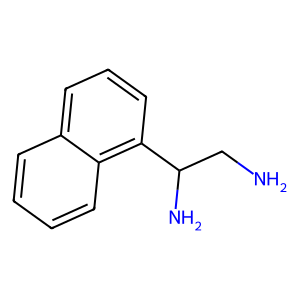

In [115]:
smiles = "C1=CC2=CC=CC(C(N)CN)=C2C=C1"

mol = Chem.MolFromSmiles(smiles)
if mol is None:
    raise ValueError("Invalid SMILES string. Please check the structure.")

img = Draw.MolToImage(mol, size=(300, 300))
display(img)

## OH Mol - (OH instead of R)

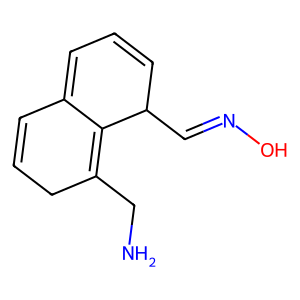

In [128]:
smiles = "C1=CC2=CC=CC(C=NO)C2=C(CN)C1"
molOH = Chem.MolFromSmiles(smiles)

img = Draw.MolToImage(molOH, size=(300, 300))
display(img)


## Programmed Mol - (Dummy Atoms)

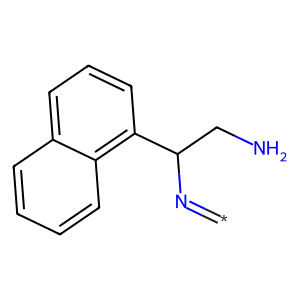

In [123]:
base_smiles = "C1=CC2=CC=CC(CCN)=C2C=C1"
mol = Chem.MolFromSmiles(base_smiles)
editable_mol = Chem.EditableMol(mol)

nitrogen_atom_idx = editable_mol.AddAtom(Chem.Atom(7))

editable_mol.AddBond(7, nitrogen_atom_idx, Chem.BondType.SINGLE)

dummy_atom_idx = editable_mol.AddAtom(Chem.Atom(0))
editable_mol.AddBond(nitrogen_atom_idx, dummy_atom_idx, Chem.BondType.DOUBLE)

programmed_mol = editable_mol.GetMol()

img = Draw.MolToImage(programmed_mol, size=(300, 300))
display(img)


# Implementation Tests

I've implemented tests below for Mutation, Growth, and Linking for the `Standard Mol` and `OH Mol`.

However, trying to implement these tests for `Programmed Mol` fails, probably because of the dummy atoms

## Mutation

### Standard Mol

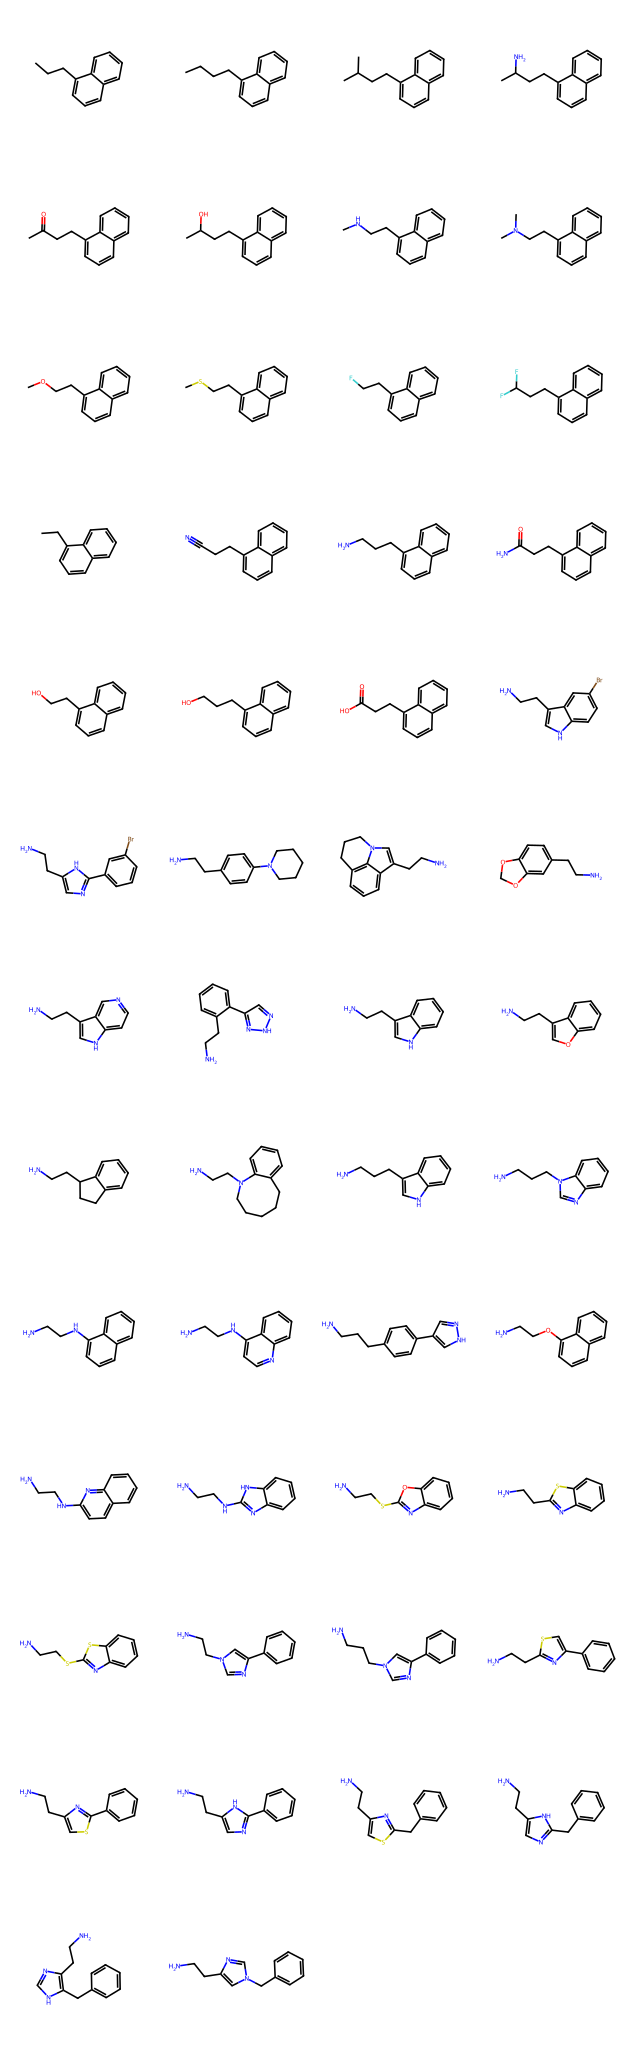

In [131]:
from crem.crem import mutate_mol

mutated_smiles = list(mutate_mol(mol, db_name=db))

mutated_mols = [Chem.MolFromSmiles(s) for s in mutated_smiles]

if mutated_mols:
    grid_img = Draw.MolsToGridImage(mutated_mols, molsPerRow=4, subImgSize=(200, 200), useSVG=True)
    display(grid_img)
else:
    print("No valid mutated molecules were generated. Check the database or replace_ids.")


### OH Mol

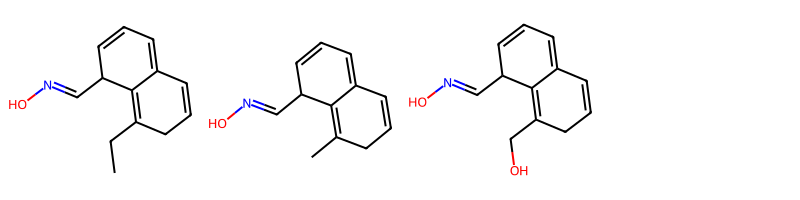

In [132]:
from crem.crem import mutate_mol

mutated_smiles = list(mutate_mol(molOH, db_name=db))

mutated_mols = [Chem.MolFromSmiles(s) for s in mutated_smiles]

if mutated_mols:
    grid_img = Draw.MolsToGridImage(mutated_mols, molsPerRow=4, subImgSize=(200, 200), useSVG=True)
    display(grid_img)
else:
    print("No valid mutated molecules were generated. Check the database or replace_ids.")

## Growth

### Standard Mol

['CNCC1=C2C(=CC=CC2C=N)C=CC1', 'CCNCC1=C2C(=CC=CC2C=N)C=CC1']


[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:12:21] WARNING: not removing hydrogen atom with dummy atom neighbors


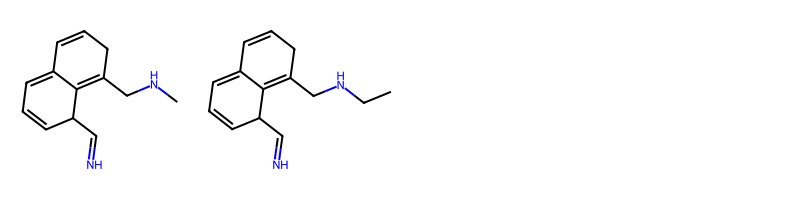

In [108]:
from crem.crem import grow_mol

grown_smiles = list(grow_mol(mol, db_name=db, replace_ids=[]))

grown_mols = [Chem.MolFromSmiles(s) for s in grown_smiles]

print(grown_smiles)

# Visualize the grown molecules
if grown_mols:
    grid_img = Draw.MolsToGridImage(grown_mols, molsPerRow=4, subImgSize=(200, 200), useSVG=True)
    display(grid_img)
else:
    print("No valid growth was performed. Check fragment database or replace_ids.")


['CNCC1=C2C(=CC=CC2C=NO)C=CC1', 'CCNCC1=C2C(=CC=CC2C=NO)C=CC1']


[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:33:00] WARNING: not removing hydrogen atom with dummy atom neighbors


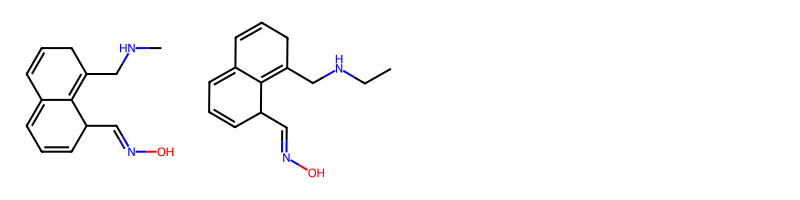

In [133]:
from crem.crem import grow_mol

grown_smiles = list(grow_mol(molOH, db_name=db, replace_ids=[]))

grown_mols = [Chem.MolFromSmiles(s) for s in grown_smiles]

print(grown_smiles)

# Visualize the grown molecules
if grown_mols:
    grid_img = Draw.MolsToGridImage(grown_mols, molsPerRow=4, subImgSize=(200, 200), useSVG=True)
    display(grid_img)
else:
    print("No valid growth was performed. Check fragment database or replace_ids.")


## Linking

### Standard Mol

[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:42:58] WARNING: not removing hydrogen atom with

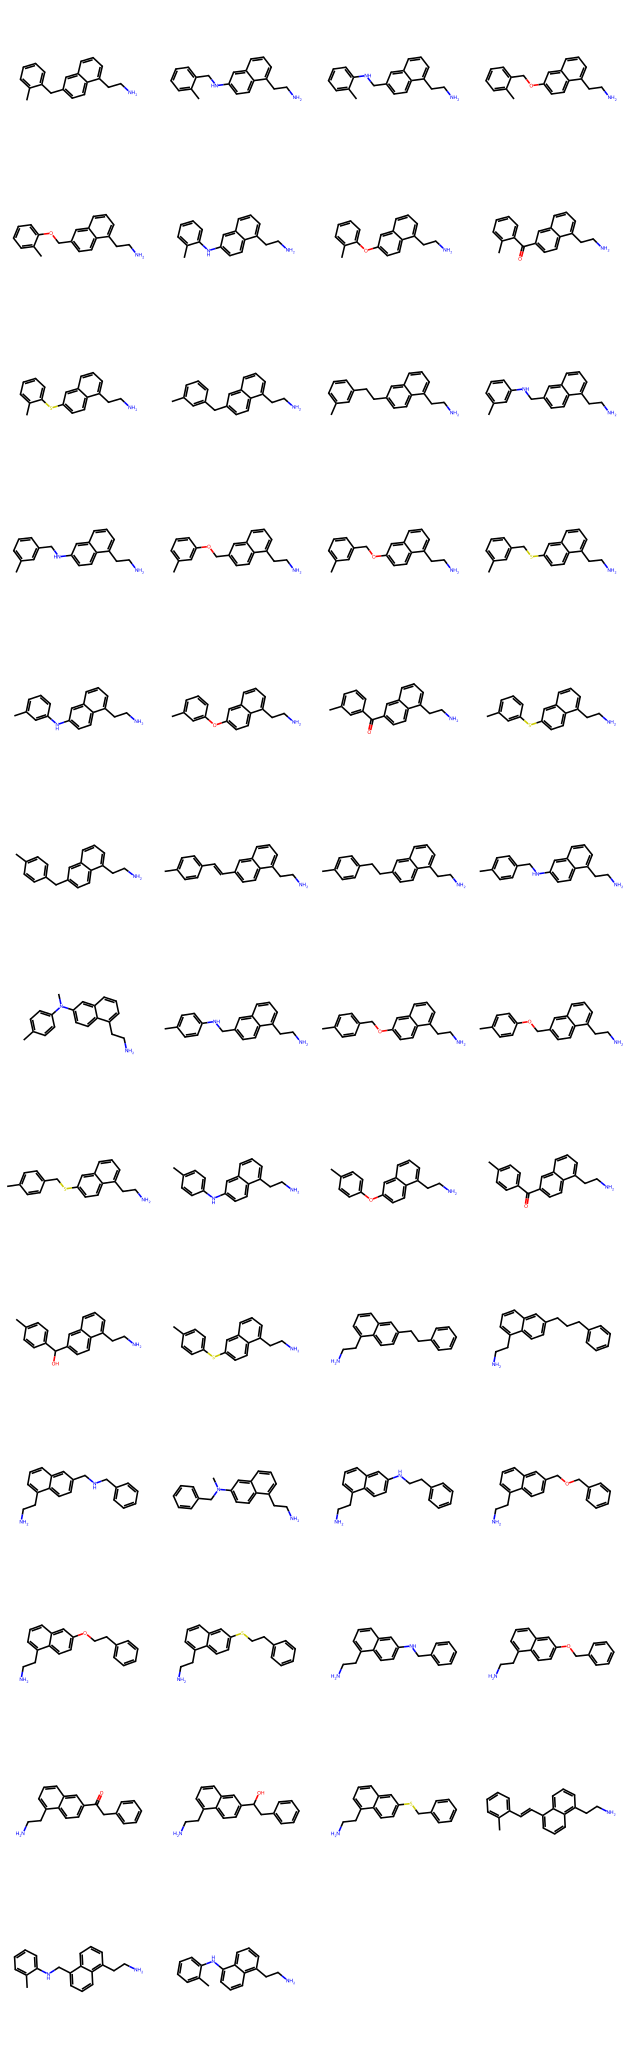

In [ ]:
from crem.crem import link_mols

m2 = Chem.MolFromSmiles("C1=CC=CC=C1C")

linked_smiles = list(link_mols(mol, m2, db_name=db))
linked_mols = [Chem.MolFromSmiles(s) for s in linked_smiles]

if linked_mols:
    grid_img = Draw.MolsToGridImage(linked_mols, molsPerRow=4, subImgSize=(200, 200), useSVG=True)
    display(grid_img)
else:
    print("No valid linking occurred. Check fragment database or replace_ids.")


[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with dummy atom neighbors
[16:43:25] WARNING: not removing hydrogen atom with

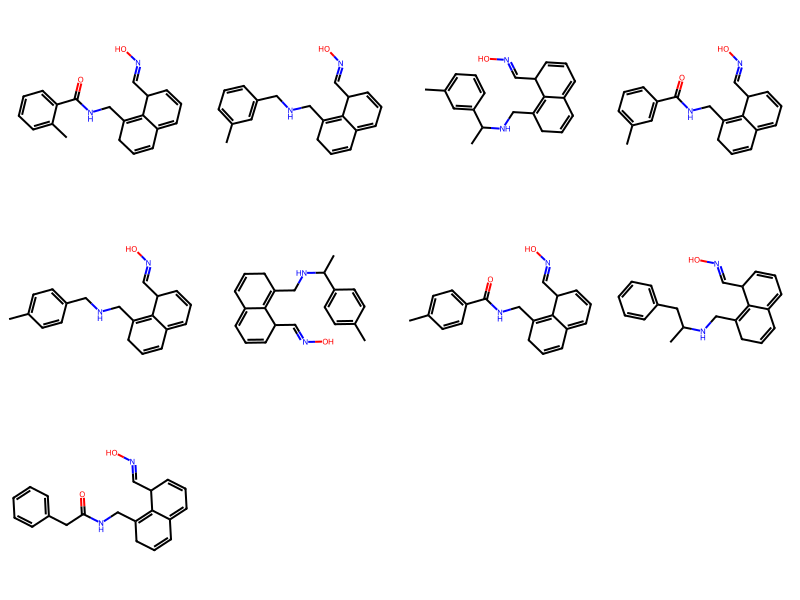

In [ ]:
from crem.crem import link_mols

m2 = Chem.MolFromSmiles("C1=CC=CC=C1C")

linked_smiles = list(link_mols(molOH, m2, db_name=db))
linked_mols = [Chem.MolFromSmiles(s) for s in linked_smiles]

if linked_mols:
    grid_img = Draw.MolsToGridImage(linked_mols, molsPerRow=4, subImgSize=(200, 200), useSVG=True)
    display(grid_img)
else:
    print("No valid linking occurred. Check fragment database or replace_ids.")
